In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("http://bit.ly/w-data")  # read the csv file(comma separated)

In [9]:
df.shape

(25, 2)

In [8]:
#we can see that our data has two columns hours and scores
#In this project we will predict scores on the basis of no of Hours.
df.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


- Hours is predictor or independent variable and score is response or dependent variable.
- The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

In [10]:
# To see satistical details of our dataframe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


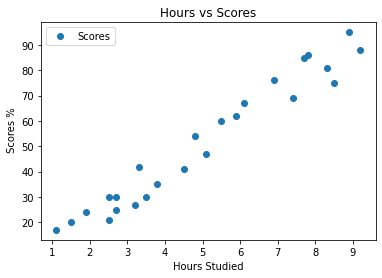

In [14]:
# Now lets see the relationship between these columns
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel(' Scores %')
plt.show()

from above graph we can see that there is positive linear relationship beween hours and score. Or in other words as the hours increases,the student's score also improved.

In [15]:
X=df.iloc[:,:-1].values  #means all columns except last one
Y=df.iloc[:,1].values  #,means last column

In [17]:
# Now split our data into train and test set. Here our model will train its parameters by train set and then predict on test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
#test_size=0.2 means 20% of total data is in test set and 80% of remaining data is in train set

In [19]:
# now shape of our data
print("X_train  y_train : ",X_train.shape,y_train.shape)
print("X_test, y_test : ",X_test.shape,y_test.shape)


X_train  y_train :  (20, 1) (20,)
X_test, y_test :  (5, 1) (5,)


### Training
We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
#training on X_train ,y_train and learning the parameters for best fitted line i.e best value for slope and intercept

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#we can also see the value of slope and intercept
print("Intercept of predicted best fitted line ",regressor.intercept_)
print("Slope of predicted best fitted line",regressor.coef_)


Intercept of predicted best fitted line  2.018160041434662
Slope of predicted best fitted line [9.91065648]


### Making Predictions

In [22]:
y_pred = regressor.predict(X_test)

In [31]:
# lets see the actual y_test and predicted values of the model(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Residuals': y_pred-y_test})

In [32]:
print(df)

   Actual  Predicted  Residuals
0      20  16.884145  -3.115855
1      27  33.732261   6.732261
2      69  75.357018   6.357018
3      30  26.794801  -3.205199
4      62  60.491033  -1.508967


### Visualise the line

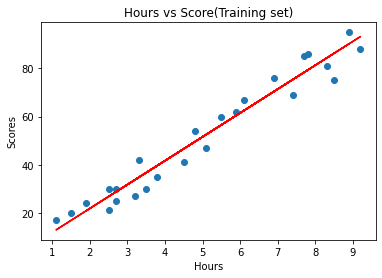

In [28]:
plt.scatter(X,Y)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Hours vs Score(Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Evaluate the performance of our algorithm
The distance of the point from 0 specifies how bad the prediction was for that value. If the value is positive, then the prediction is low. If the value is negative, then the prediction is high. 0 value indicates prefect prediction. Detecting residual pattern can improve the model.

Text(0, 0.5, 'Residual')

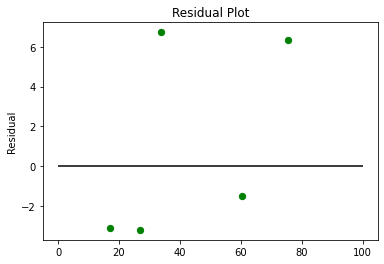

In [29]:
# Residual Plot
plt.scatter(y_pred,y_pred-y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title("Residual Plot")
plt.ylabel("Residual")

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset

In [34]:
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)
# if it is 1, the two variables are perfectly correlated, i.e., 
#with no variance at all. A low value would show a low level of correlation, meaning a regression model  is not valid

coefficient of determination: 0.9515510725211553


In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [36]:
# Now predict for 9.25 hours
ques=[[9.25]]
ans=regressor.predict(ques)
print(" if a student study for 9.25 hrs in a day then its predicted score will be ",ans[0])

 if a student study for 9.25 hrs in a day then its predicted score will be  93.69173248737539
